## Problem Set 1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sy

## Asset Pricing 

We have a model here with two states. It's a two agent economy with 4 states of nature that occur with equal probability. There are two assets, $A^{1}$ and $A^{2}$ with payoff configuration (1,1,1,1) and (1,1,1.5.1.5). The agents in the economy have VnM utility of the form,
$$
\begin{array}{c}
\max_{\theta_{1},\theta_{2}} U(c^{z})=v(c_0)+\dfrac{1}{4}\sum_{i=1}^{4}v(c_i)\\
\end{array}
$$
with
$v(c)=\dfrac{c^{1-\gamma}}{1-\gamma}$

The agents in the economy choose the holding of the two assets, s.t. $\theta^{h}_{1}$,$\theta^{h}_{2}$ for h=1,2
s.t.
$$
\begin{array}{c}
\max_{\theta^{h}_{1},\theta^{h}_{2}} U(c^{h})=v(c_0^{h})+E[v(c_s^{h})]
 \\
\end{array}
$$
s.t. 
$$
\begin{array}{c}
c^h_{0}=e^h_{0}-q_{1}*\theta^h_{1}-q_{2}*\theta^h_{2} \\
c^h_{s}=e^h_{s}+A^1_{s} *\theta^h_{1}+A^2_{s} *\theta^h_{2}\\ for \\ s=1,2,3,4
\end{array}
$$

The first order condition is 
$$
\begin{array}{c}
-q_{1}v^{1}(c^h_{0})+E[v'(c^h_{s})A^1_{s})]=0\\
-q_{2}v^{2}(c^h_{0})+E[v'(c^h_{s})A^2_{s})]=0\\
\end{array}
$$
for h=2.

The market clearing condition that we have here is the following
$$
\begin{array}{c}
\theta^1_1 +\theta^2_1=0\\
\theta^2_1 +\theta^2_2=0
\end{array}
$$

A competitive equilibrium in this economy will be an allocation of prices, asset holdings such that both the agents maximize their consumption subject to their constraints and the market clears.

The FOC conditions  and market clearing conditions are therefore,

$$
\begin{array}{c}
-q_{1}v(c^1_{0})+E[v'(c^1_{s})A^1_{s})]=0\\
-q_{2}v(c^1_{0})+E[v'(c^1_{s})A^2_{s})]=0\\
-q_{1}v(c^2_{0})+E[v'(c^2_{s})A^1_{s})]=0\\
-q_{2}v(c^2_{0})+E[v'(c^2_{s})A^2_{s})]=0\\
\theta^1_1 +\theta^2_1=0\\
\theta^1_2 +\theta^2_2=0
\end{array}
$$


In [2]:
import numpy as np
from scipy.optimize import fsolve
gamma = 2
def eqm(x):
    
    beta  = 1
    theta_1_1 = x[0]
    theta_1_2 = x[1]
    theta_2_1 = x[2]
    theta_2_2 = x[3]
    q_1 = x[4]
    q_2 = x[5]
    f = np.zeros(6)
    c_0_1 = 1- q_1*theta_1_1 - q_2 * theta_2_1
    c_0_2 = 1- q_1*theta_1_2 - q_2 * theta_2_2
    c_1_1 = 1 + theta_1_1 + theta_2_1
    c_1_2 = 3 + theta_1_2 + theta_2_2
    c_2_1 = 2 + theta_1_1 + theta_2_1
    c_2_2 = 1 + theta_1_2 + theta_2_2
    c_3_1 = 1 + theta_1_1 + (theta_2_1 * 1.5)
    c_3_2 = 3 + theta_1_2 + (theta_2_2 * 1.5)
    c_4_1 = 2 + theta_1_1 + (theta_2_1 * 1.5)
    c_4_2 = 1 + theta_1_2 + (theta_2_2 * 1.5)
    f[0] = (c_0_1 ** (-gamma))*(-q_1) + .25*((c_1_1** (-gamma)) + (c_2_1 **(-gamma)) + (c_3_1 ** (-gamma)) + (c_4_1**(-gamma)))
    f[1] = (c_0_2 ** -gamma)*(-q_1) + .25*(c_1_2 **-gamma + c_2_2 **-gamma + c_3_2**-gamma + c_4_2**-gamma)
    f[2] = (c_0_1 ** -gamma)*(-q_2) + .25*(c_1_1 **-gamma + c_2_1 **-gamma + (c_3_1**-gamma)*1.5 + (c_4_1**-gamma)*1.5)
    f[3] = (c_0_2 ** -gamma)*(-q_2) + .25*(c_1_2 **-gamma + c_2_2 **-gamma + (c_3_2**-gamma)*1.5 + (c_4_2**-gamma)*1.5)
    f[4] = theta_1_1 + theta_1_2
    f[5] = theta_2_1 + theta_2_2
    return f


In [3]:
fsolve(eqm, [.1, 1.0, 0.1, 0.1, .03, .01])    

array([ 1.95406655e-02, -1.95406655e-02,  3.29805698e-11, -3.29805697e-11,
        5.89777656e-01,  7.37222070e-01])

## Negative holding suggests shorting of assets. High preference for asset 1 looks like the case here. If we increase gamma, the (risk aversion coefficient), one would expect to see higher holding of the safer asset, in this case asset 1.


Extreme values of gamma led to run time warning.

## Tic Tac Toe using Value Function iteration

The components are the ones we see typically in a dynamic programming setup.

Agent with an action space.

Payoffs: (+10,-10,0) different actions are associated with different payoffs.  Minmax algorithm 

State: The State space.

In [1]:
import copy

class XO:
    def opp_sign(self, sign):
        return 'O' if sign == 'X' else 'X' 

class Board:
    def __init__(self, size):
        self.s = size
        self.q = size*size
        self.empty = [i for i in range(self.q)]
        self.grid = ['.'] * self.q
    def ins(self, move, sign):
        self.grid[move] = sign
        self.empty = [i for i in self.empty if i != move]
    def is_full(self):
        return not len(self.empty)
    def get_col(self, col):
        return [self.grid[i] for i in range(col-1, self.q, self.s)] 
    def get_row(self, row):
        return self.grid[(row-1)*self.s:row*self.s] 
    def get_diag1(self):
        return [self.grid[i] for i in range(0, self.q, self.s+1)] 
    def get_diag2(self):
        return [self.grid[i] for i in range(self.s-1, self.q, self.s-1)][:-1] 
    def __str__(self):
        return '\n'.join([' '.join(map(str,self.grid[i:i+self.s])) 
                for i in range(0, self.q, self.s)]) + '\n'
    
class Tree:
    def find_best_move(self,board,depth,sign):
        """
        :greedy
        :param board:
        :return:
        """
        if (board.empty==[]): return None
    
        best_move=-(2**(board.s**2))
        m=board.empty[0]
        for move in board.empty:
            b=copy.deepcopy(board)
            b.ins(move,sign)
            if (self.is_win(b,sign) or self.is_win(b,xo.opp_sign(sign))):
                return move
            curr_move=self.minimax(b,depth,False,xo.opp_sign(sign))
            if (curr_move > best_move):
                best_move = curr_move
                m=move
            #print(curr_move,best_move,m)
        return m #This should be the right move to do....
    
    
    # *****************************************************************************************************#
    
    def minimax(self,board,depth,myTurn,sign):
        """
        :param depth:
        :param myTurn:
        :return:
        """
        #print(depth,end='\n')
        if (self.is_win(board,xo.opp_sign(sign))):
            if myTurn: 
                return -(board.s**2+1) + depth
            else:
                return (board.s**2+1) - depth
                
        elif (board.is_full()):
            return 0
    
        if (myTurn):
            bestVal=-(2**700)
            for move in board.empty: #empty - the empty squares at the board 
                b = copy.deepcopy(board)
                b.ins(move, sign)
                value=self.minimax(b,depth+1,not myTurn, xo.opp_sign(sign))
                #xo.opp_sign(sign) - if function for the opposite sign: x=>o and o=>x
                bestVal = max([bestVal,value])
    
        else:
            bestVal = (2**700)
            for move in board.empty:
                b = copy.deepcopy(board)
                b.ins(move, sign) ## error xo.opp_sign(sign))
                value = self.minimax(b, depth + 1, not myTurn, xo.opp_sign(sign))
                #print("opp val: ",value)
                bestVal = min([bestVal, value])

        #print(depth, ' minimax returns ', bestVal, sign, myTurn, 'for:')
        #print(board)
        return bestVal

    
    # *****************************************************************************************************#
    def is_win(self,board, sign):
        """
        The function gets a board and a sign.
        :param board: The board.
        :param sign: The sign (There are only two options: x/o).
        :return: True if sign "wins" the board, i.e. some row or col or diag are all with then sing. Else return False.
        """
    
        temp=board.s
        wins = []  # The options to win at the game.
        for i in range(1, temp + 1):
            wins.append(board.get_col(i))
            wins.append(board.get_row(i))
        wins.append(board.get_diag1())
        wins.append(board.get_diag2())
    
        for i in wins:
            if (self.is_same(i, sign)):
                return True
        return False
    
    
    
    # *****************************************************************************************************#
    def is_same(self, l, sign):
        """
        The function get a list l and returns if ALL the list have the same sign.
        :param l: The list.
        :param sign: The sign.
        :return: True or false
        """
    
        for i in l:
            if (i != sign):
                return False
        return True

# Main program        
xo = XO()
board = Board(3)
tree = Tree()
sign = 'O'
human = False
while not board.is_full() and not tree.is_win(board, sign):
    sign = xo.opp_sign(sign)
    human = not human
    if human:
        move = input('your move as {} (0-8):'.format(sign))
    else:
        print('calculating Ani.hold on!...')
        move = tree.find_best_move(board, 0, sign)
    board.ins(int(move), sign)
    print (board)



your move as X (0-8):0
X . .
. . .
. . .

calculating Ani.hold on!...
X . .
. O .
. . .

your move as X (0-8):2
X . X
. O .
. . .

calculating Ani.hold on!...
X O X
. O .
. . .

your move as X (0-8):7
X O X
. O .
. X .

calculating Ani.hold on!...
X O X
O O .
. X .

your move as X (0-8):5
X O X
O O X
. X .

calculating Ani.hold on!...
X O X
O O X
. X O

your move as X (0-8):7
X O X
O O X
. X O

calculating Ani.hold on!...
X O X
O O X
O X O



# Problem 3

In [5]:
N = 50 # number of grid-points for the capital grid
k_low = 0.1 # lower bound for the capital grid
k_high = 10 # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N).reshape(1, N) #grid for capital

# Now we initialize the value function, I like to initialize it to zero.
V_init = np.zeros((2, N))
beta = 0.9

In [6]:
def u(c):
    """
    input: 
    c: consumption
    
    output:
    utility received from consumption
    """
    return np.log(c)

#Value function update for a given state:

def actionvalue_allchoices(k_index, V_old):
    """
    input:
    k_index: index so that k_grid[index] corresponds to value of capital this period (state)
    V_old: approximation to the value function. V_old[i] approximates V(k_grid[i]).
    
    output:
    action_value: value of all possible state-action pairs.
    """
    k = k_grid[0,k_index]
    
    action_value = np.zeros_like(V_old) #(2,N)
    c = np.zeros_like(V_old)
    c[0,:] = 0.9*k**0.3 + 0.3 * k - k_grid # consumption implied by policy k_next in state k
    c[1,:] = 1.1*k**0.3 + 0.9 * k - k_grid
 
    action_value[c <= 0] = -999999 # set value to -HUGE for negative consumption
    action_value[c > 0] = u(c[c > 0])
    
    EV_old=V_old.mean(axis=0).reshape(1,N)
    
    action_value=action_value + beta * EV_old #(2,N)
    
    return action_value

def vf_update(i, V_old):
    """
    input:
    i: index corresponding to the entry of the value-function vector which is updated
    V_old: value function vector from the previous iteration
    
    output:
    Vi_new: updated value for the value function vector at entry i.
    """    
    Vi_new = actionvalue_allchoices(i, V_old).max(axis=1)
    
    return Vi_new

#one update iteration:
def vf_update_iteration(V_old):
    """
    input: 
    V_old: array with current approximation of the value function
    
    output:
    V_new: updated approximation of the value function
    """
    V_new = np.zeros_like(V_old)
    for ii in range(V_new.shape[1]):
        V_new[:,ii] = vf_update(ii, V_old)
    return V_new

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26


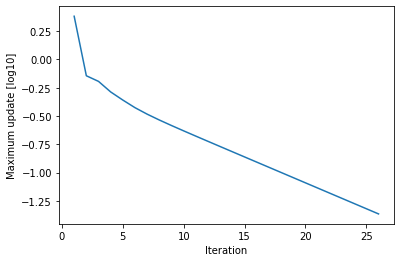

Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76


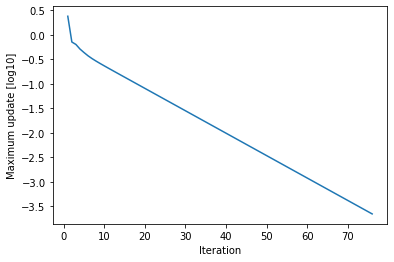

Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
Iteration: 101
Iteration: 102
Iteration: 103
Iteration: 104
Iteration: 105
Iteration: 106
Iteration: 107
Iteration: 108
Iteration: 109
Iteration: 110
Iteration: 111
Iteration: 112
Iteration: 113
Iteration: 114
Iteration: 115
Iteration: 116
Iteration: 117
Iteration: 118
Iteration: 119
Iteration: 120
Iteration: 121
Iteration: 122
Iteration: 123
Iteration: 124
Iteration: 125
Iteration: 126


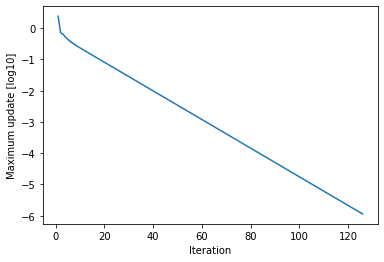

Iteration: 127
Iteration: 128
Iteration: 129
Iteration: 130
Iteration: 131
Iteration: 132
Iteration: 133
Iteration: 134
Iteration: 135
Iteration: 136
Iteration: 137
Iteration: 138
Iteration: 139
Iteration: 140
Iteration: 141
Iteration: 142
Iteration: 143
Iteration: 144
Iteration: 145
Iteration: 146
Iteration: 147
Iteration: 148
Iteration: 149
Iteration: 150
Iteration: 151
Iteration: 152
Iteration: 153
Iteration: 154
Iteration: 155
Iteration: 156
Iteration: 157
Iteration: 158
Iteration: 159
Iteration: 160
Iteration: 161
Iteration: 162
Iteration: 163
Iteration: 164
Iteration: 165
Iteration: 166
Iteration: 167
Iteration: 168
Iteration: 169
Iteration: 170
Iteration: 171
Iteration: 172
Iteration: 173
Iteration: 174
Iteration: 175
Iteration: 176


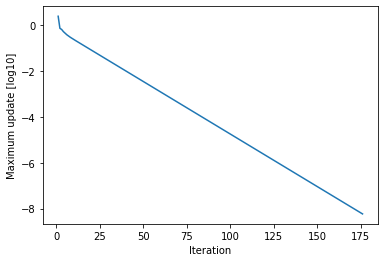

Iteration: 177
Iteration: 178
Iteration: 179
Iteration: 180
Iteration: 181
Iteration: 182
Iteration: 183
Iteration: 184
Iteration: 185
Iteration: 186
Iteration: 187
Iteration: 188
Iteration: 189
Iteration: 190
Iteration: 191
Iteration: 192
Iteration: 193
Iteration: 194
Iteration: 195
Iteration: 196
Iteration: 197
Iteration: 198
Iteration: 199
Iteration: 200
Iteration: 201
Iteration: 202
Iteration: 203
Iteration: 204
Iteration: 205
Iteration: 206
Iteration: 207
Iteration: 208
Iteration: 209
Iteration: 210
Iteration: 211
Iteration: 212
Iteration: 213
Iteration: 214
Iteration: 215
Converged after iteration 215


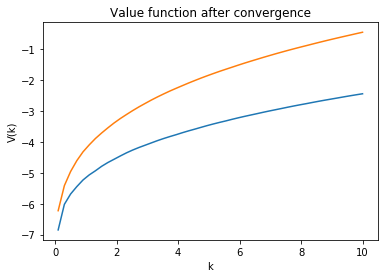

In [7]:
from matplotlib import pyplot as plt

difference_list = []
threshold = 1e-10
max_iterations = 10000
plot_interval = 50

V = V_init.copy()

for iteration in range(max_iterations):
    print('Iteration: {}'.format(iteration + 1))
    
    V_new = vf_update_iteration(V)
    difference = np.max(np.abs(V_new-V))
    
    difference_list.append(difference) 
    
    V = V_new.copy()
    
    if difference < threshold:
        print('Converged after iteration {}'.format(iteration + 1))
        
        plt.figure()
        plt.plot(k_grid[0,:], V[0,:], label='s=1')
        plt.plot(k_grid[0,:], V[1,:], label='s=2')
        plt.xlabel('k')
        plt.ylabel('V(k)')
        plt.title('Value function after convergence')
        plt.show();
        break
        
    if iteration%plot_interval == 25:
        
        plt.figure()
        plt.plot(np.arange(1, iteration+2), np.log10(np.array(difference_list)))
        plt.xlabel('Iteration')
        plt.ylabel('Maximum update [log10]')
        plt.show();

In [8]:
N = 500 # number of grid-points for the capital grid
k_low = 0.1 # lower bound for the capital grid
k_high = 10 # upper bound for capital grid
k_grid = np.linspace(k_low, k_high, N).reshape(1, N) #grid for capital

# Now we initialize the value function, I like to initialize it to zero.
V_init = np.zeros((2, N))

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26


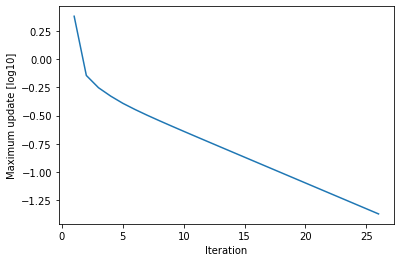

Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76


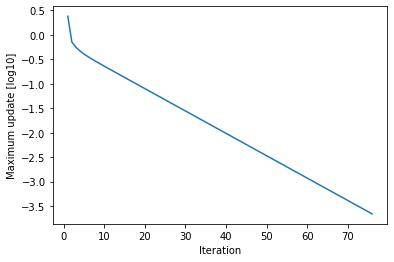

Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
Iteration: 101
Iteration: 102
Iteration: 103
Iteration: 104
Iteration: 105
Iteration: 106
Iteration: 107
Iteration: 108
Iteration: 109
Iteration: 110
Iteration: 111
Iteration: 112
Iteration: 113
Iteration: 114
Iteration: 115
Iteration: 116
Iteration: 117
Iteration: 118
Iteration: 119
Iteration: 120
Iteration: 121
Iteration: 122
Iteration: 123
Iteration: 124
Iteration: 125
Iteration: 126


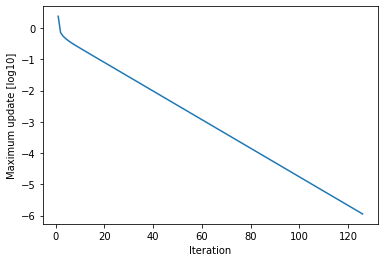

Iteration: 127
Iteration: 128
Iteration: 129
Iteration: 130
Iteration: 131
Iteration: 132
Iteration: 133
Iteration: 134
Iteration: 135
Iteration: 136
Iteration: 137
Iteration: 138
Iteration: 139
Iteration: 140
Iteration: 141
Iteration: 142
Iteration: 143
Iteration: 144
Iteration: 145
Iteration: 146
Iteration: 147
Iteration: 148
Iteration: 149
Iteration: 150
Iteration: 151
Iteration: 152
Iteration: 153
Iteration: 154
Iteration: 155
Iteration: 156
Iteration: 157
Iteration: 158
Iteration: 159
Iteration: 160
Iteration: 161
Iteration: 162
Iteration: 163
Iteration: 164
Iteration: 165
Iteration: 166
Iteration: 167
Iteration: 168
Iteration: 169
Iteration: 170
Iteration: 171
Iteration: 172
Iteration: 173
Iteration: 174
Iteration: 175
Iteration: 176


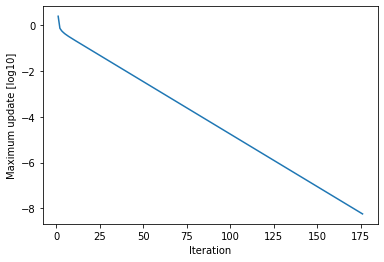

Iteration: 177
Iteration: 178
Iteration: 179
Iteration: 180
Iteration: 181
Iteration: 182
Iteration: 183
Iteration: 184
Iteration: 185
Iteration: 186
Iteration: 187
Iteration: 188
Iteration: 189
Iteration: 190
Iteration: 191
Iteration: 192
Iteration: 193
Iteration: 194
Iteration: 195
Iteration: 196
Iteration: 197
Iteration: 198
Iteration: 199
Iteration: 200
Iteration: 201
Iteration: 202
Iteration: 203
Iteration: 204
Iteration: 205
Iteration: 206
Iteration: 207
Iteration: 208
Iteration: 209
Iteration: 210
Iteration: 211
Iteration: 212
Iteration: 213
Iteration: 214
Iteration: 215
Converged after iteration 215


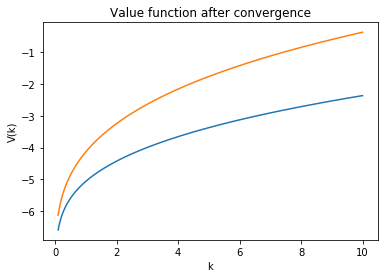

In [9]:
from matplotlib import pyplot as plt

difference_list = []
threshold = 1e-10
max_iterations = 10000
plot_interval = 50

V = V_init.copy()

for iteration in range(max_iterations):
    print('Iteration: {}'.format(iteration + 1))
    
    V_new = vf_update_iteration(V)
    difference = np.max(np.abs(V_new-V))
    
    difference_list.append(difference) 
    
    V = V_new.copy()
    
    if difference < threshold:
        print('Converged after iteration {}'.format(iteration + 1))
        
        plt.figure()
        plt.plot(k_grid[0,:], V[0,:], label='s=1')
        plt.plot(k_grid[0,:], V[1,:], label='s=2')
        plt.xlabel('k')
        plt.ylabel('V(k)')
        plt.title('Value function after convergence')
        plt.show();
        break
        
    if iteration%plot_interval == 25:
        
        plt.figure()
        plt.plot(np.arange(1, iteration+2), np.log10(np.array(difference_list)))
        plt.xlabel('Iteration')
        plt.ylabel('Maximum update [log10]')
        plt.show();

In [ ]:
## Problem 4 Couldn't do